<img src='./img/egu21_logo.png' alt='Logo EU Copernicus EUMETSAT' align='left' width='25%'></img><img src='./img/atmos_logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='65%'></img></span>

<br>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./14_Sentinel-5P_TROPOMI_AI_L2_exercise_solution.ipynb"><< 14 - Sentinel-5P TROPOMI AI Level 2 - Exercise Solution</a>

<div class="alert alert-block alert-info">
<b>EXERCISE WORKBOOK</b>
</div>

<hr>

# Metop-A/B/C GOME-2 - Absorbing Aerosol Index (AAI) - Level 3

This notebook is an `exercise workbook` which allows you to practise the preparation of Metop-A/B/C GOME-2 Absorbing Aerosol Index (AAI) Level 3 data to analyse a dust event at the beginning of February 2021.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code.
You recognize `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<br>

#### Outline:
* [1 - Load and browse Metop-A GOME-2 Level 3 AAI data](#load_browse)
* [2 - Concatenate the data from the three satellites Metop-A, -B and -C](#concat)
* [3 - Retrieve  time coordinate information and assign time coordinates to the time dimension](assign_time_coord)
* [4 - Combine AAI data from the three satellites Metop-A, -B, and -C onto one single grid](#combine)
* [5 - Visualize AAI data with data from the three satellites Metop-A, -B, and C combined on one single grid](#visualize)
* [6 - Animate daily Metop-A/B/C GOME-2 Level 3 Absorbed Aerosol Index (AAI) data for 21 to 23 February 2021](#animate)



<hr>

##### Load required libraries

In [1]:
import os
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime
#import ffmpeg

from IPython.display import HTML

# Python libraries for visualisation
from matplotlib import pyplot as plt
from matplotlib import animation
import ipynb


import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

##### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id='load_browse'></a>Load and browse Metop-A GOME-2 Level 3 AAI data

The Metop-A/B/C GOME-3 Level 3 AAI data files can be downloaded from the TEMIS website in `NetCDF` data format. TEMIS offers the data of all three satellites Metop-A, -B and -C, which, combined, provide daily measurements for the entire globe.

The following example uses daily gridded AAI data from the three satellites Metop-A, -B, and -C for 3 consecutive days between `5 to 7 February 2021`. The example shows the dispersion of aerosols during the Saharan dust event mainly over Italy and Eastern Europe.

Daily gridded data is available for each satellite. Thus, the first step is to inspect one file to get a better understanding of the general data structure. Followed by loading the data files for the entire time period into one `xarray.DataArray` and to repeat this for each of the three satellites Metop-A, -B and -C.

### Inspect the structure of one daily gridded AAI data file

The data is in the folder `../../eodata/gome2/level3/aai/saharan_dust/`. Since the data is distributed in the `NetCDF` format, you can use the xarray function `xr.open_dataset()` to load one single file to better understand the data structure.

In [3]:
file = './eodata/gome2/level3/aai/saharan_dust/ESACCI-AEROSOL-L3-AAI-GOME2A-1D-20210205-fv1.8.nc'
aai_gome2a = xr.open_dataset(file)
aai_gome2a

<xarray.Dataset>
Dimensions:                  (latitude: 180, longitude: 360)
Coordinates:
  * longitude                (longitude) float32 -179.5 -178.5 ... 178.5 179.5
  * latitude                 (latitude) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    absorbing_aerosol_index  (latitude, longitude) float32 ...
    number_of_observations   (latitude, longitude) int16 ...
    solar_zenith_angle       (latitude, longitude) float32 ...
Attributes:
    Conventions:                CF-1.6
    title:                      ESA CCI absorbing aerosol index level 3 product
    description:                Multi-Sensor AAI field for 05-02-2021
    institution:                Royal Netherlands Meteorological Institute (K...
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-aerosol-cci.org
    product_version:            1.8
    cdm_data_type:              Grid
    date_created:               20210206T080350Z
    source:                     GOME-2A AAI version 1.35
    platform:                   METOP-A
    sensor:                     GOME-2
    history:                    2021-02-06 08:03:50 - Product generated using...
    tracking_id:                610f87b0-6ac8-11e6-bdf4-0800200c9a66
    keywords:                   satellite, atmosphere, aerosols, absorbing ae...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    naming_authority:           knmi.nl
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    creator_name:               Royal Netherlands Meteorological Institute (K...
    creator_url:                http://www.knmi.nl
    creator_email:              tilstra@knmi.nl
    geospatial_lat_min:         -90.0
    geospatial_lat_max:         90.0
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lat_resolution:  1.0
    geospatial_lon_resolution:  1.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    comment:                    Sun glint and solar eclipse events were filte...
    license:                    ESA CCI Data Policy: free and open access
    summary:                    This dataset contains absorbing aerosol index...

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Inspect the loaded `xarray.Dataset`:
- How many dimensions does the data array have?
- What data variables does the xarray.Dataset offer?
</div>

**Response:**<br>
The output of the `xarray.Dataset` above shows that one file contains the data of three variables: <br>
* `absorbing_aerosol_index`,
* `number_of_observations`, and
* `solar_zenith_angle`. 


<br>

The next step is to select the variable of interest from the xarray.Dataset `aai_gome2a` and load the variable as `xarray.DataArray`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the data variable <b>absorbing_aerosol_index</b> from the xarray.Dataset <i>aai_gome2a</i> and call it <b>aai</b> 
</div>

In [ ]:
# Enter your solution here








In [4]:
aai = aai_gome2a['absorbing_aerosol_index']
aai

<xarray.DataArray 'absorbing_aerosol_index' (latitude: 180, longitude: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
Can you identify the resolution of the loaded `xarray.DataArray`?
</div>

**Response:**<br>
From the `longitude` and `latidue` coordinates, you can see that the daily gridded data are on a 1 deg x 1 deg data grid, with 180 latitude values and 360 longitude values.

<br>

### Load a time-series of daily Metop-A GOME-2 Level 3 AAI data into one `xarray.Dataset`

The next step is to load the daily gridded AAI data from the Metop-A satellite fro the three days from 5 to 7 February 2021. 
The xarray `open_mfdataset()` function allows the opening of multiple files at once. You have to specify the dimension the files shall be concatenated by. It can be an existing dimension within the data file or a new dimension, which is newly specified.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which opens the daily gridded AAI data from the Metop-A satellite for the three days from 5 to 7 February 2021:<br> 
- use the xarray function `open_mfdataset()` to do so,<br>
- specify `time` as the concat_dim kwarg, and <br>
- specify `combine='nested'`.<br>

Call them new xarray.Dataset `ds_a`.

After you loaded the multiple files in a `Dataset` with the function `open_mfdataset()`, you have to select `absorbing_aerosol_index` again as the variable of interest. Call the `xarray.DataArray` `aai_a`.
</div>

In [ ]:
# Enter your solution here









In [5]:
ds_a = xr.open_mfdataset('./eodata/gome2/level3/aai/saharan_dust/ESACCI-AEROSOL-L3-AAI-GOME2A-1D-2021020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_a=ds_a['absorbing_aerosol_index']
aai_a

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

The same process has to be repeated for the daily gridded AAI data from the satellites Metop-B and Metop-C respectively.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which opens the daily gridded AAI data from the Metop-B satellite for the three days from 5 to 7 February 2021:<br> 
- use the xarray function `open_mfdataset()` to do so,<br>
- specify `time` as the concat_dim kwarg, and <br>
- specify `combine='nested'`.<br>

Call them new xarray.Dataset `ds_b`.

After you loaded the multiple files in a `Dataset` with the function `open_mfdataset()`, you have to select `absorbing_aerosol_index` again as the variable of interest. Call the `xarray.DataArray` `aai_b`.
</div>

In [ ]:
# Enter your solution here









In [6]:
ds_b = xr.open_mfdataset('./eodata/gome2/level3/aai/saharan_dust/ESACCI-AEROSOL-L3-AAI-GOME2B-1D-2021020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_b =ds_b['absorbing_aerosol_index']
aai_b

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which opens the daily gridded AAI data from the Metop-C satellite for the three days from 5 to 7 February 2021:<br> 
- use the xarray function `open_mfdataset()` to do so,<br>
- specify `time` as the concat_dim kwarg, and <br>
- specify `combine='nested'`.<br>

Call them new xarray.Dataset `ds_c`.

After you loaded the multiple files in a `Dataset` with the function `open_mfdataset()`, you have to select `absorbing_aerosol_index` again as the variable of interest. Call the `xarray.DataArray` `aai_c`.
</div>

In [ ]:
# Enter your solution here









In [7]:
ds_c = xr.open_mfdataset('./eodata/gome2/level3/aai/saharan_dust/ESACCI-AEROSOL-L3-AAI-GOME2C-1D-2021020*.nc', 
                         concat_dim='time', 
                         combine='nested')

aai_c=ds_c['absorbing_aerosol_index']
aai_c

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

## Concatenate the data from the three satellites Metop-A, -B and -C

The overall goal is to bring the AAI data from all three satellites together. Thus, the next step is to concatenate the `DataArrays` from the three satellites Metop-A, -B and -C.


<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which concatenates the loaded `xarray.DataArrays` from the three satellites Metop-A, -B and -C defining a new dimension called `satellite`.
Use the xarray function `concat()` to do this.
</div>

In [ ]:
# Enter your solution here








In [8]:
aai_concat = xr.concat([aai_a,aai_b,aai_c], dim='satellite')
aai_concat

<xarray.DataArray 'absorbing_aerosol_index' (satellite: 3, time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 3, 180, 360), dtype=float32, chunksize=(1, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: satellite, time
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

How is the concatenated array structured? How many dimensions does it have and what coordinate information does it hold?
</div>

**Response:**<br>
The result is a four-dimensional `xarray.DataArray`, with the dimensions `satellite`, `time`, `latitude` and `longitude`.
You can see that the resulting `xarray.DataArray` holds coordinate information for the two spatial dimensions `longitude` and `latitude`, but not for `time` and `satellite`.


<br>

## <a id='assign_time_coord'></a>Retrieve  time coordinate information and assign time coordinates for the time dimension

By inspecting the metadata of the single data file `aai_gome2a` we loaded at the beginning, you can see that the only metadata attribute that contains the valid time step is the `description` attribute.

The first step is to retrieve the metadata attribute `description` and to split the resulting string object at the positions with a space. The day string is the fourth position of the resulting string.

The `description` attribute can be accessed directly from the `aai_gome2a` `Dataset` object.

In [9]:
start_day = aai_gome2a.description.split()[4]
start_day

'05-02-2021'

With the help of the Python library `pandas`, you can build a `DateTime` time series for the three consecutive days, starting from the `start_day` variable that was defined above.

You can use the `date_range` function from pandas, using the length of the time dimension of the `aai_concat` DataArray and `'d'` (for day) as freqency argument.

The result is a time-series with `DateTime` information from 5 to 7 February 2021.

In [10]:
time_coords = pd.date_range(datetime.strptime(start_day, '%d-%m-%Y'), periods=len(aai_concat.time), freq='d').strftime("%Y-%m-%d").astype('datetime64[ns]')
time_coords

DatetimeIndex(['2021-02-05', '2021-02-06', '2021-02-07'], dtype='datetime64[ns]', freq=None)

<br>

The final step is to assign the pandas time series object `time_coords` to the `aai_concat` DataArray object. You can use the `assign_coords()` function from xarray.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which assigns the time series object `time_coords` as time coordinate to the `xarray.DataArray` `aai_concat`. <br>You can use the `assign_coords()` function from the xarray library to do so.
</div>

In [ ]:
# Enter your solution here








In [11]:
aai_concat = aai_concat.assign_coords(time=time_coords)
aai_concat

<xarray.DataArray 'absorbing_aerosol_index' (satellite: 3, time: 3, latitude: 180, longitude: 360)>
dask.array<concatenate, shape=(3, 3, 180, 360), dtype=float32, chunksize=(1, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2021-02-05 2021-02-06 2021-02-07
Dimensions without coordinates: satellite
Attributes:
    long_name:  Absorbing aerosol index averaged for each grid cell
    units:      1

<br>

## <a id='combine'></a>Combine AAI data from the three satellites Metop-A, -B and -C onto one single grid

Since the final aim is to combine the data from the three satellites Metop-A, -B and -C onto one single grid, the next step is to reduce the `satellite` dimension. 

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which reduces the `satellite` dimension of the `xarray.DataArray` `aai_concat` and call the new data array `aai_combined`. You can do this by applying the reduce function `mean`. The dimension (`dim`) to be reduced is the `satellite` dimension.

</div>

In [ ]:
# Enter your solution here








In [12]:
aai_combined = aai_concat.mean(dim='satellite')
aai_combined

<xarray.DataArray 'absorbing_aerosol_index' (time: 3, latitude: 180, longitude: 360)>
dask.array<mean_agg-aggregate, shape=(3, 180, 360), dtype=float32, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) datetime64[ns] 2021-02-05 2021-02-06 2021-02-07

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

What is the function `mean` doing? How many dimensions does the resulting data array have?
</div>

**Response**: <br>
This function builds the average of all data points within a grid cell. The resulting `xarray.DataArray` has three dimensions `time`, `latitude` and `longitude`.

<br>

## <a id='visualize'></a>Visualize AAI data with data from the three satellites Metop-A, -B and C combined on one single grid

The next step is to visualize the Absorbing Aerosol Index data for one time step.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) in order to visualize the xarray.DataArray <code>aai_combined</code>. <br>
    
The following kwargs have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color_sale`
* `unit`
* `longname`
* `vmin`,
* `vmax`,
* `lonmin`, `lonmax`, `latmin`, `latmax`
* `set_global`
    
**HINT**: 
* with `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plo
* you can use `afmhot_r` as color map, `ccrs.PlateCarree()` as projection and by applying `dt.strftime('%Y-%m-%d').data` to the time coordinate variable, you can add the valid time step to the title of the plot.

</div>

In [ ]:
# Enter your solution here










(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Absorbing aerosol index averaged for each grid cell 2021-02-06'}>)

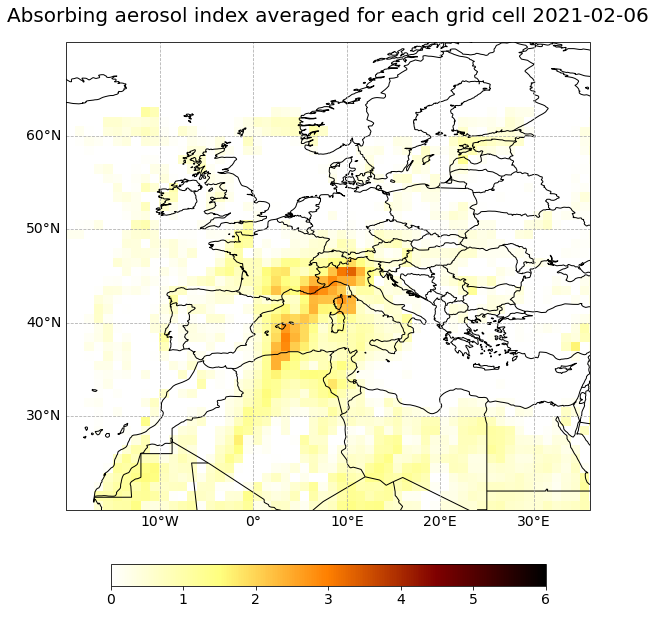

In [13]:
visualize_pcolormesh(data_array=aai_combined[1,:,:],
                     longitude=aai_combined.longitude, 
                     latitude=aai_combined.latitude,
                     projection=ccrs.PlateCarree(), 
                     color_scale='afmhot_r', 
                     unit=' ',
                     long_name=aai_a.long_name + ' ' + str(aai_combined.time[1].dt.strftime('%Y-%m-%d').data), 
                     vmin=0, 
                     vmax=6, 
                     lonmin=-20, 
                     lonmax=36, 
                     latmin=20, 
                     latmax=70.,
                     set_global=False)


<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./14_Sentinel-5P_TROPOMI_AI_L2_exercise_solution.ipynb"><< 14 - Sentinel-5P TROPOMI AI Level 2 - Exercise Solution</a>

<hr>

<img src='../../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.